# First Applying BAG OF WORDS , and then using RandomForest classifier ,Algorithm used is decision trees  
accuracy attained :74.45%(using RandomForest classifier)  
accuracy attained :73%(using XGBooster)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [95]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [82]:
df =df.sample(30000,random_state =2)

In [83]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
ques_df =df[['question1','question2']]
ques_df.head()

,question1,question2
245836,Why are some people dumb?,Why are people so dumb on Quora?
146350,"How can I earn money online, seriously?",How do I make money online without spending mo...
346417,My girlfriend was away for 2 months. After she...,What it is like to be cheated upon in a relati...
63454,Which is the best app for navigation?,What is the best app for navigation?
99086,Is anyone unhappy with the LG G4?,Which is the best power bank for an LG G4?


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1'])+list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
bow = cv.fit_transform(questions).toarray()
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [173]:
q1_arr , q2_arr = np.vsplit(bow,2)


In [66]:
ques_df.index

Index([245836, 146350, 346417,  63454,  99086, 340966, 123132, 365460, 328388,
       229199,
       ...
       325787, 314411, 153875,  41161, 384755, 244756, 118796, 159521, 362568,
       189449],
      dtype='int64', length=30000)

In [67]:
temp_df1 = pd.DataFrame(q1_arr,index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index= ques_df.index)
temp_df = pd.concat([temp_df1 , temp_df2],axis =1 )
temp_df.shape

(30000, 6000)

In [68]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
245836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244756,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
118796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159521,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
362568,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
features = temp_df.iloc[:,0:-1].values
labels = temp_df.iloc[:,-1].values


In [74]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(features,labels,test_size= 0.2 , random_state = 1)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred) *100 , '%') 


74.45 %


In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)


In [81]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print('XGB Boost:',accuracy_score(y_test,y_pred)*100 , '%')

XGB Boost: 73.45 %


 # Feature engineering to add new features.  

* question1_len
* question2_len
* question1_total_words
* question_2_total_words
* common_words
* total_words
* words_share = common_words/total_words

In [144]:
df = pd.read_csv('train.csv')
df = df.sample(30000,random_state =2)

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

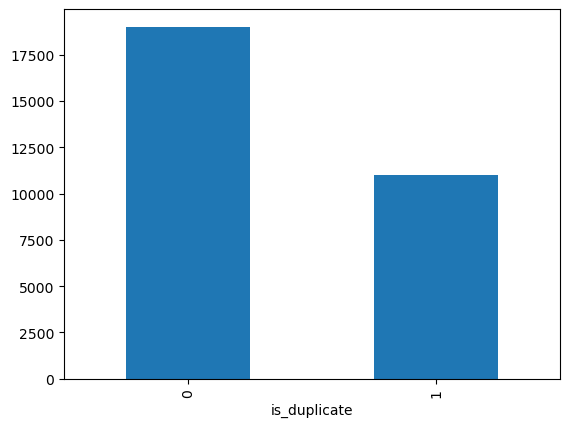

In [145]:
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100 )
df['is_duplicate'].value_counts().plot(kind ='bar')

In [146]:
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('No of unique Questions:',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('No of Repeated Questions:',x[x].shape[0])

No of unique Questions: 55299
No of Repeated Questions: 3480


In [147]:
df.shape

(30000, 6)

In [148]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [149]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [150]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [151]:
df['q1_num_words'] = df['question1'].apply(lambda row:len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row:len(row.split(" ")))

In [152]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [153]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [154]:
df['common_words'] = df.apply(common_words,axis = 1)

In [155]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [156]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)

In [157]:
df['total_words'] = df.apply(total_words,axis = 1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [158]:
df['word_share'] = round(df['common_words']/df['total_words'],2)

In [159]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


# analyse features  
 * helps in detecting outliers
 * helps in enforcing feature selection

Minimum characters: 2
Maximum characters: 391
Average characters: 59


/Users/fawazelahi/ml project/duplicate question pairs/env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


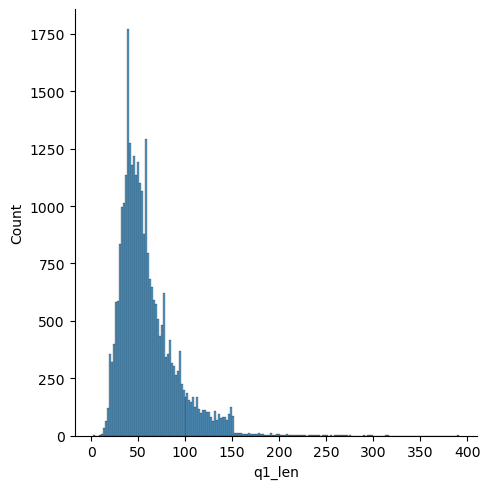

In [160]:
sns.displot(df['q1_len'])
print('Minimum characters:',df['q1_len'].min())
print('Maximum characters:',df['q1_len'].max())
print('Average characters:',int(df['q1_len'].mean()))


Minimum characters: 6
Maximum characters: 1151
Average characters: 60


/Users/fawazelahi/ml project/duplicate question pairs/env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


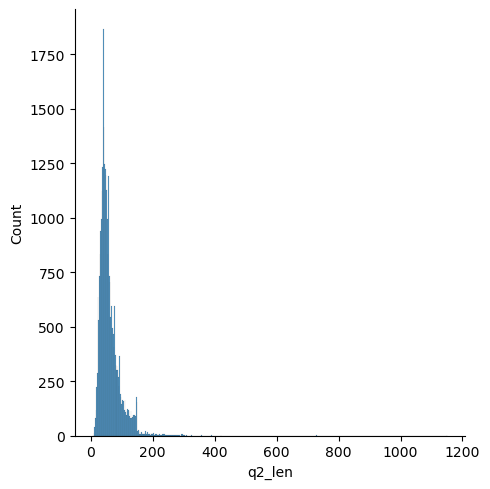

In [161]:
sns.displot(df['q2_len'])
print('Minimum characters:',df['q2_len'].min())
print('Maximum characters:',df['q2_len'].max())
print('Average characters:',int(df['q2_len'].mean()))

Minimum Words: 1
Maximum Words: 72
Average Words: 10


/Users/fawazelahi/ml project/duplicate question pairs/env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


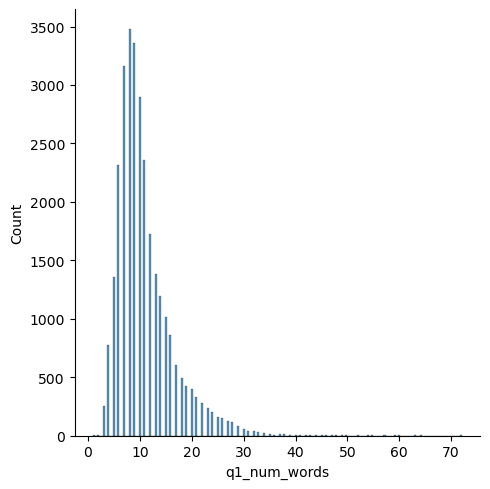

In [162]:
sns.displot(df['q1_num_words'])
print('Minimum Words:',df['q1_num_words'].min())
print('Maximum Words:',df['q1_num_words'].max())
print('Average Words:',int(df['q1_num_words'].mean()))

Minimum Words: 1
Maximum Words: 237
Average Words: 11


/Users/fawazelahi/ml project/duplicate question pairs/env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


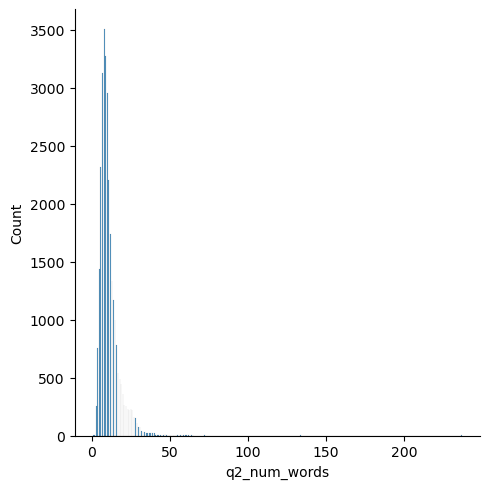

In [163]:
sns.displot(df['q2_num_words'])
print('Minimum Words:',df['q2_num_words'].min())
print('Maximum Words:',df['q2_num_words'].max())
print('Average Words:',int(df['q2_num_words'].mean()))

/var/folders/x9/rv_2hwz55f12gq6k1kcsdtvc0000gn/T/ipykernel_2595/3554105599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['common_words'],label = 'non_duplicate')
/var/folders/x9/rv_2hwz55f12gq6k1kcsdtvc0000gn/T/ipykernel_2595/3554105599.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

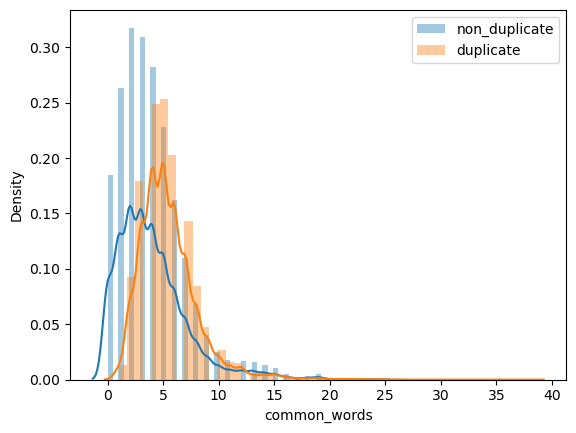

In [164]:
#common words plotting
sns.distplot(df[df['is_duplicate'] == 0]['common_words'],label = 'non_duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['common_words'],label = 'duplicate')
plt.legend()
plt.show()

/var/folders/x9/rv_2hwz55f12gq6k1kcsdtvc0000gn/T/ipykernel_2595/2518614714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['total_words'],label = 'non_duplicate')
/var/folders/x9/rv_2hwz55f12gq6k1kcsdtvc0000gn/T/ipykernel_2595/2518614714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

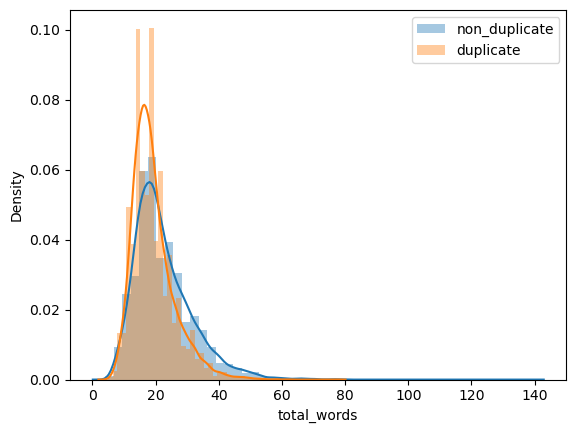

In [165]:
sns.distplot(df[df['is_duplicate'] == 0]['total_words'],label = 'non_duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['total_words'],label = 'duplicate')
plt.legend()
plt.show()

/var/folders/x9/rv_2hwz55f12gq6k1kcsdtvc0000gn/T/ipykernel_2595/1271846951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label = 'non_duplicate')
/var/folders/x9/rv_2hwz55f12gq6k1kcsdtvc0000gn/T/ipykernel_2595/1271846951.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

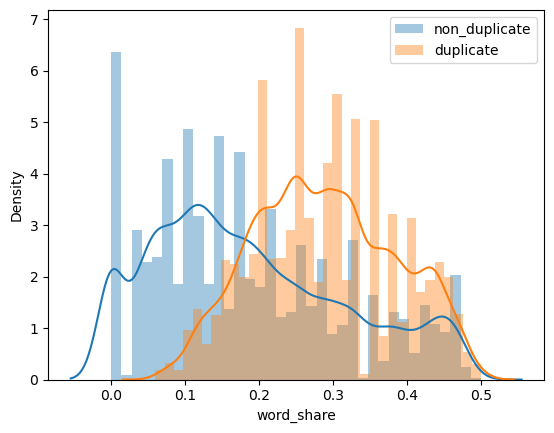

In [166]:
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label = 'non_duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label = 'duplicate')
plt.legend()
plt.show()

In [167]:
final_df = df.drop(columns = ['id','qid1','qid2','question1','question2'])


In [168]:
final_df.shape

(30000, 8)

In [172]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [176]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [177]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1'])+list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
bow = cv.fit_transform(questions).toarray()
q1_arr , q2_arr = np.vsplit(bow,2)

In [178]:
temp_df1 = pd.DataFrame(q1_arr,index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index= ques_df.index)
temp_df = pd.concat([temp_df1 , temp_df2],axis =1 )
temp_df.shape

(30000, 6000)

In [180]:
final_df = pd.concat([final_df,temp_df],axis = 1)

In [181]:
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,1,42,41,7,7,6,14,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,68,61,12,12,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,73,98,14,17,4,30,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0
71112,1,51,45,10,10,5,20,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
features = final_df.iloc[:,1:].values
labels = final_df.iloc[:,0].values
x_train,x_test,y_train,y_test = tts(features,labels,test_size= 0.2 , random_state = 1)

In [185]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred) *100 , '%') 


77.11666666666666 %


In [186]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print('XGB Boost:',accuracy_score(y_test,y_pred)*100 , '%')

XGB Boost: 76.44999999999999 %
